In [1]:
from subjects import DIPSubject

curr_trial = "Acting1"
# curr_trial = "3"
# curr_trial = "01"

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from subjects.constants import NIMBLE_BODY_NODES_UIP, NIMBLE_BODY_NODES_DIP, NIMBLE_BODY_NODES_TOTAL_CAPTURE
from subjects.uip_subject import UIPSubject
from subjects.dip_imu_subject import DIPSubject
from subjects.total_capture_subject import TotalCaptureSubject

import nimblephysics as nimble

GEOMETRY_PATH = "/home/meribejayson/Desktop/Projects/realistic-imu/data/final_dataset/Geometry/"
trial_path_uip = "/home/meribejayson/Desktop/Projects/realistic-imu/data/final_dataset/UIP/S0.b3d"
trial_path_dip = "/home/meribejayson/Desktop/Projects/realistic-imu/data/final_dataset/DIP/S1.b3d"
trial_path_tot_cap = "/home/meribejayson/Desktop/Projects/realistic-imu/data/final_dataset/Total-Capture/S1.b3d"

In [3]:
subject = TotalCaptureSubject(trial_path_tot_cap, GEOMETRY_PATH, NIMBLE_BODY_NODES_TOTAL_CAPTURE)
# subject = DIPSubject(trial_path_dip, GEOMETRY_PATH, NIMBLE_BODY_NODES_DIP)
# subject = UIPSubject(trial_path_uip, GEOMETRY_PATH, NIMBLE_BODY_NODES_UIP)

Setting len to 0.101812
Setting neutral pos to   0
0.7
  0
Setting len to 0.34597
Setting neutral pos to    0
-0.6
   0
Setting len to 0.112955
Setting neutral pos to   0
0.2
  0


In [4]:
synthetic_accelerations = subject.syn_imu[curr_trial]["acc"]
real_accelerations = subject.trial_imu_map[curr_trial]["acc"]

KeyError: 'Acting1'

In [5]:
synthetic_accelerations.shape

(4111, 13, 3)

In [6]:
np.mean(np.abs(synthetic_accelerations - real_accelerations))

96.37223085548158

In [7]:
differences = np.abs(synthetic_accelerations - real_accelerations).flatten()

percent_differences = np.sum((differences < 6).astype(float)) / len(differences)

print(percent_differences)

0.6076442814462761


In [1]:
subject.generate_nimble_visualization(curr_trial)

NameError: name 'subject' is not defined

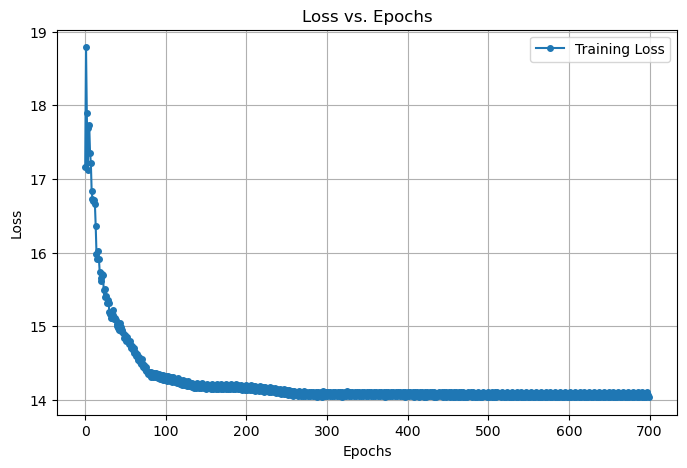

In [9]:
losses = subject.opt_trans[curr_trial]["losses"]

plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(losses)), losses, label="Training Loss", marker="o", linestyle="-", markersize=4)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs. Epochs")
plt.legend()
plt.grid(True)
plt.show()

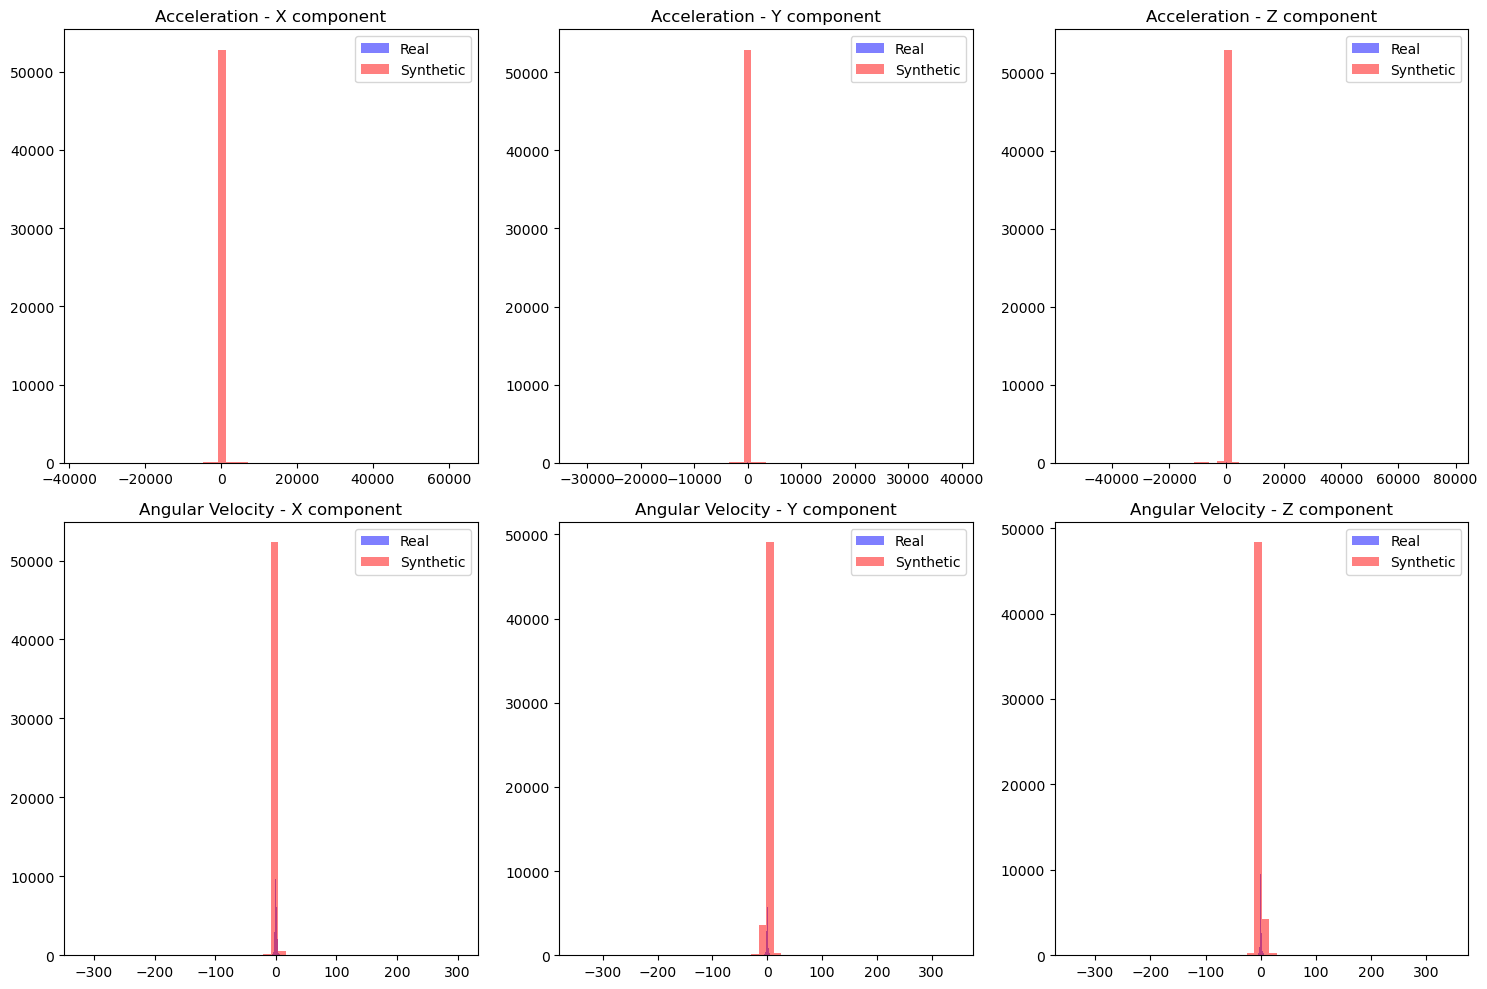

In [10]:
# Create subplots for acceleration and angular velocity comparisons
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))

# Define number of bins for histograms
n_bins = 50

# Plot histogram for acceleration - X component
ax1.hist(subject.trial_imu_map[curr_trial]["acc"][:, :, 0].flatten(), bins=n_bins, alpha=0.5, label='Real',
         color='blue')
ax1.hist(subject.syn_imu[curr_trial]["acc"][:, :, 0].flatten(), bins=n_bins, alpha=0.5, label='Synthetic', color='red')
ax1.set_title('Acceleration - X component')
ax1.legend()

# Plot histogram for acceleration - Y component  
ax2.hist(subject.trial_imu_map[curr_trial]["acc"][:, :, 1].flatten(), bins=n_bins, alpha=0.5, label='Real',
         color='blue')
ax2.hist(subject.syn_imu[curr_trial]["acc"][:, :, 1].flatten(), bins=n_bins, alpha=0.5, label='Synthetic', color='red')
ax2.set_title('Acceleration - Y component')
ax2.legend()

# Plot histogram for acceleration - Z component
ax3.hist(subject.trial_imu_map[curr_trial]["acc"][:, :, 2].flatten(), bins=n_bins, alpha=0.5, label='Real',
         color='blue')
ax3.hist(subject.syn_imu[curr_trial]["acc"][:, :, 2].flatten(), bins=n_bins, alpha=0.5, label='Synthetic', color='red')
ax3.set_title('Acceleration - Z component')
ax3.legend()

# Plot histogram for angular velocity - X component
ax4.hist(subject.trial_imu_map[curr_trial]["ang_vel"][:, :, 0].flatten(), bins=n_bins, alpha=0.5, label='Real',
         color='blue')
ax4.hist(subject.syn_imu[curr_trial]["angular_vel"][:, :, 0].flatten(), bins=n_bins, alpha=0.5, label='Synthetic',
         color='red')
ax4.set_title('Angular Velocity - X component')
ax4.legend()

# Plot histogram for angular velocity - Y component
ax5.hist(subject.trial_imu_map[curr_trial]["ang_vel"][:, :, 1].flatten(), bins=n_bins, alpha=0.5, label='Real',
         color='blue')
ax5.hist(subject.syn_imu[curr_trial]["angular_vel"][:, :, 1].flatten(), bins=n_bins, alpha=0.5, label='Synthetic',
         color='red')
ax5.set_title('Angular Velocity - Y component')
ax5.legend()

ax6.hist(subject.trial_imu_map[curr_trial]["ang_vel"][:, :, 2].flatten(), bins=n_bins, alpha=0.5, label='Real',
         color='blue')
ax6.hist(subject.syn_imu[curr_trial]["angular_vel"][:, :, 2].flatten(), bins=n_bins, alpha=0.5, label='Synthetic',
         color='red')
ax6.set_title('Angular Velocity - Z component')
ax6.legend()

plt.tight_layout()
plt.show()


In [11]:
# Calculate Euclidean length means for accelerations and angular velocities
acc_means = {
    'real': {
        'x': np.mean(subject.trial_imu_map[curr_trial]["acc"][:, :, 0]),
        'y': np.mean(subject.trial_imu_map[curr_trial]["acc"][:, :, 1]),
        'z': np.mean(subject.trial_imu_map[curr_trial]["acc"][:, :, 2]),
        'euclidean': np.mean(np.sqrt(np.sum(subject.trial_imu_map[curr_trial]["acc"] ** 2, axis=2)))
    },
    'synthetic': {
        'x': np.mean(subject.syn_imu[curr_trial]["acc"][:, :, 0]),
        'y': np.mean(subject.syn_imu[curr_trial]["acc"][:, :, 1]),
        'z': np.mean(subject.syn_imu[curr_trial]["acc"][:, :, 2]),
        'euclidean': np.mean(np.sqrt(np.sum(subject.syn_imu[curr_trial]["acc"] ** 2, axis=2)))
    }
}

ang_vel_means = {
    'real': {
        'x': np.mean(subject.trial_imu_map[curr_trial]["ang_vel"][:, :, 0]),
        'y': np.mean(subject.trial_imu_map[curr_trial]["ang_vel"][:, :, 1]),
        'z': np.mean(subject.trial_imu_map[curr_trial]["ang_vel"][:, :, 2]),
        'euclidean': np.mean(np.sqrt(np.sum(subject.trial_imu_map[curr_trial]["ang_vel"] ** 2, axis=2)))
    },
    'synthetic': {
        'x': np.mean(subject.syn_imu[curr_trial]["angular_vel"][:, :, 0]),
        'y': np.mean(subject.syn_imu[curr_trial]["angular_vel"][:, :, 1]),
        'z': np.mean(subject.syn_imu[curr_trial]["angular_vel"][:, :, 2]),
        'euclidean': np.mean(np.sqrt(np.sum(subject.syn_imu[curr_trial]["angular_vel"] ** 2, axis=2)))
    }
}

print("\nAcceleration Means:")
for type_, values in acc_means.items():
    print(f"\n{type_.capitalize()}:")
    print(f"X: {values['x']:.4f}")
    print(f"Y: {values['y']:.4f}")
    print(f"Z: {values['z']:.4f}")
    print(f"Euclidean Length: {values['euclidean']:.4f}")

print("\nAngular Velocity Means:")
for type_, values in ang_vel_means.items():
    print(f"\n{type_.capitalize()}:")
    print(f"X: {values['x']:.4f}")
    print(f"Y: {values['y']:.4f}")
    print(f"Z: {values['z']:.4f}")
    print(f"Euclidean Length: {values['euclidean']:.4f}")



Acceleration Means:

Real:
X: 1.4537
Y: -1.6542
Z: 1.9541
Euclidean Length: 11.0849

Synthetic:
X: 15.9321
Y: 4.2903
Z: -26.9166
Euclidean Length: 192.1861

Angular Velocity Means:

Real:
X: 0.0222
Y: -0.0034
Z: 0.0173
Euclidean Length: 1.5955

Synthetic:
X: -0.0484
Y: -0.0349
Z: 0.0136
Euclidean Length: 4.6519


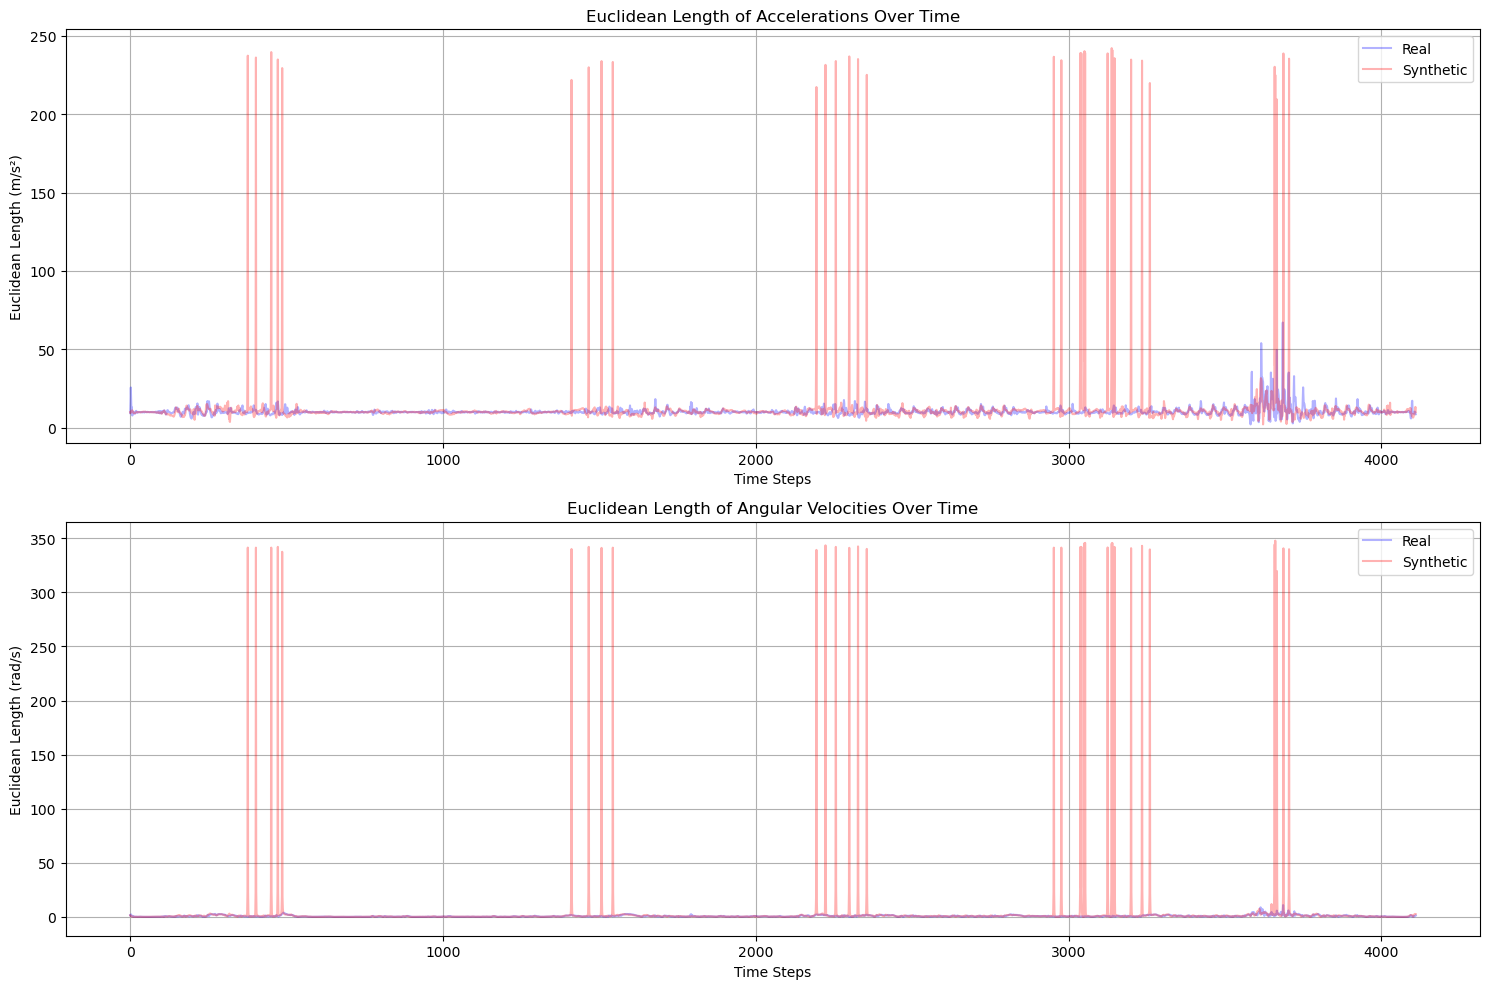

In [12]:
# Calculate Euclidean lengths over time
real_acc_euclidean = np.sqrt(np.sum(subject.trial_imu_map[curr_trial]["acc"][:, 0] ** 2, axis=-1))
syn_acc_euclidean = np.sqrt(np.sum(subject.syn_imu[curr_trial]["acc"][:, 0] ** 2, axis=-1))
real_angvel_euclidean = np.sqrt(np.sum(subject.trial_imu_map[curr_trial]["ang_vel"][:, 0] ** 2, axis=-1))
syn_angvel_euclidean = np.sqrt(np.sum(subject.syn_imu[curr_trial]["angular_vel"][:, 0] ** 2, axis=-1))

# Create stacked plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Plot accelerations
time = np.arange(real_acc_euclidean.shape[0])
ax1.plot(time, real_acc_euclidean, 'b-', alpha=0.3, label='Real')
ax1.plot(time, syn_acc_euclidean, 'r-', alpha=0.3, label='Synthetic')
ax1.set_title('Euclidean Length of Accelerations Over Time')
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('Euclidean Length (m/s²)')
ax1.legend()
ax1.grid(True)

# Plot angular velocities
ax2.plot(time, real_angvel_euclidean, 'b-', alpha=0.3, label='Real')
ax2.plot(time, syn_angvel_euclidean, 'r-', alpha=0.3, label='Synthetic')
ax2.set_title('Euclidean Length of Angular Velocities Over Time')
ax2.set_xlabel('Time Steps')
ax2.set_ylabel('Euclidean Length (rad/s)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [13]:
subject.joint_data_map[curr_trial]["joint_angles"].shape

(49, 4111)

In [14]:
def print_joint_std(subject, trial_name):
    joint_angles = subject.joint_data_map[trial_name]["joint_angles"]
    joint_vel = subject.joint_data_map[trial_name]["joint_vel"]
    joint_acc = subject.joint_data_map[trial_name]["joint_acc"]

    print("Joint Angles Standard Deviation:", np.std(joint_angles, axis=1))
    print("\nJoint Velocities Standard Deviation:", np.std(joint_vel, axis=1))
    print("\nJoint Accelerations Standard Deviation:", np.std(joint_acc, axis=1))


print_joint_std(subject, curr_trial)

Joint Angles Standard Deviation: [1.70554408 0.04491526 0.62295451 0.61836523 1.29224194 0.01513038
 0.2035143  0.10322934 0.16320371 0.30798959 0.1043598  0.16724183
 0.11883175 0.17383883 0.09949082 0.16106503 0.32096502 0.09986398
 0.12669803 0.10789686 0.10567365 0.09118161 0.04369815 0.07471866
 0.04548147 0.13315771 0.08254298 0.21073551 0.44229968 0.04055706
 0.02179234 0.11884807 0.27250524 0.24616129 0.29383319 0.38250108
 0.21567391 0.0997327  0.09889116 0.05892318 0.02494726 0.17684491
 0.24146561 0.32977549 0.32056473 0.41536713 0.27981081 0.15873194
 0.10927737]

Joint Velocities Standard Deviation: [29.68683418  0.33401323  9.53568585  0.27113885  0.77075084  0.12211456
  1.16387471  0.66421562  0.99677361  2.36601747  1.25936612  1.46973145
  1.06712939  0.96807711  0.60629927  0.99061543  2.31746597  1.03964614
  1.21000829  0.91331197  0.68205258  0.38105345  0.27535485  0.3522685
  0.2169416   0.71302036  0.40620234  0.67857303  0.99110558  0.18670272
  0.11613392  0.

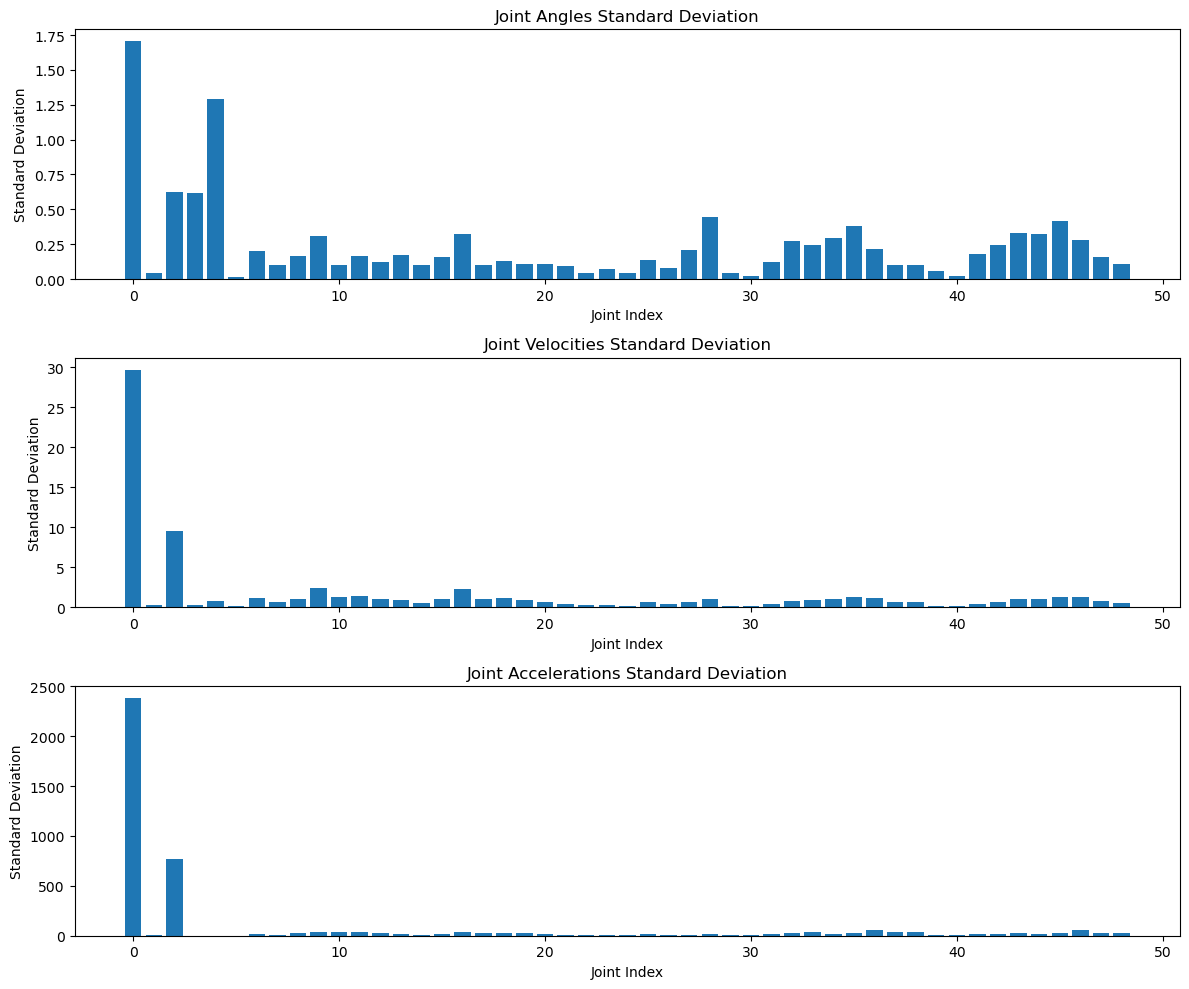

In [15]:
# Visualize the standard deviations
joint_angles_std = np.std(subject.joint_data_map[curr_trial]["joint_angles"], axis=1)
joint_vel_std = np.std(subject.joint_data_map[curr_trial]["joint_vel"], axis=1)
joint_acc_std = np.std(subject.joint_data_map[curr_trial]["joint_acc"], axis=1)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

ax1.bar(range(len(joint_angles_std)), joint_angles_std)
ax1.set_title('Joint Angles Standard Deviation')
ax1.set_xlabel('Joint Index')
ax1.set_ylabel('Standard Deviation')

ax2.bar(range(len(joint_vel_std)), joint_vel_std)
ax2.set_title('Joint Velocities Standard Deviation')
ax2.set_xlabel('Joint Index')
ax2.set_ylabel('Standard Deviation')

ax3.bar(range(len(joint_acc_std)), joint_acc_std)
ax3.set_title('Joint Accelerations Standard Deviation')
ax3.set_xlabel('Joint Index')
ax3.set_ylabel('Standard Deviation')

plt.tight_layout()
plt.show()


In [16]:
body_node_names = [subject.skeleton.getBodyNode(name).getName() for name in NIMBLE_BODY_NODES_DIP]
print(body_node_names)

['head', 'thorax', 'pelvis', 'scapula_l', 'scapula_r', 'humerus_l', 'humerus_r', 'ulna_l', 'ulna_r', 'femur_l', 'femur_r', 'tibia_l', 'tibia_r', 'hand_l', 'hand_r', 'calcn_l', 'calcn_r']
